In [2]:
import datetime as dt
import matplotlib.pyplot as plt
#import matplotlib.ticker as mtick # optional may be helpful for plotting percentage
import numpy as np
import pandas as pd
#import seaborn as sb # optional to set plot theme
import yfinance
#sb.set_theme() # optional to set plot theme

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END = dt.date.isoformat(dt.date.today())

/var/folders/jd/f_y1zkqx7qj3nlzj3h0lgsbc0000gn/T/ipykernel_37070/3736755479.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = self.get_data()


    def get_data(self):
        """method that downloads data and stores in a DataFrame
           uncomment the code below which should be the final two lines 
           of your method"""
        data = yfinance.download(self.symbol, start=self.start, end=self.end)
        self.calc_returns(data)
        return data

    
    def calc_returns(self, data):
        """method that adds change and return columns to data"""

        data['Daily Difference'] = data['Close'].diff()
        data['Instantaneous Return'] = np.log(data['Close']).diff().round(4)
        

    
    def plot_return_dist(self):
        """method that plots instantaneous returns as histogram"""
        self.data['Instantaneous Return'].hist()
        plt.title(f"Instantaneous Return Distribution for {self.symbol}")
        plt.xlabel("Returns")
        plt.ylabel("Frequency")
        plt.show()


    def plot_performance(self):
        """method that plots stock object performance as percent """
        normalized = (self.data['Close'] / self.data['Close'].iloc[0]) * 100
        normalized.plot()
        plt.title(f"Performance of {self.symbol}")
        plt.xlabel("Date")
        plt.ylabel("Normalized Close Price")
        plt.show()



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-13  150.949997  154.259995  150.919998  153.850006  153.033173   
2023-02-14  152.119995  153.770004  150.860001  153.199997  152.386597   
2023-02-15  153.110001  155.500000  152.880005  155.330002  154.505295   
2023-02-16  153.509995  156.330002  153.350006  153.710007  152.893890   
2023-02-17  152.350006  153.000000  150.850006  152.550003  151.740067   
...                ...         ...         ...         ...         ...   
2024-02-05  188.149994  189.250000  185.839996  187.679993  187.440811   
2024-02-06  186.860001  189.309998  186.770004  189.300003  189.058762   
2024-02-07  190.639999  191.050003  188.610001  189.410004  189.168625   
2024-02-08  189.389999  189.539993  187.350006  188.320007  188.080017   
2024-02-09  188.649994  189.990005  188.000000  188.850006  188.850006   

              Volume  Daily Differenc

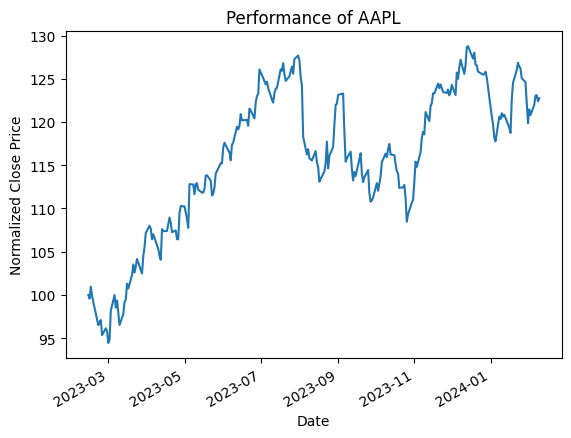

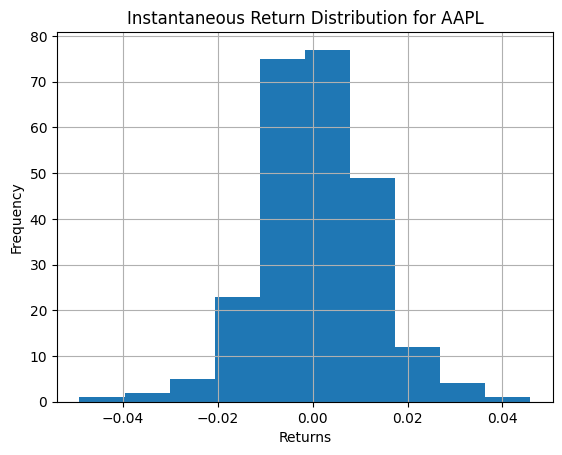

In [4]:
def main():
    # uncomment (remove pass) code below to test
    test = Stock('AAPL') # optionally test custom data range
    print(test.data)
    test.plot_performance()
    test.plot_return_dist()
    

if __name__ == '__main__':
    main() 